# CI Final Work - Titanic Neural Network

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
def encode_label(df):
    #Label
    return df.astype('category').cat.codes

## Visualizing the data

In [0]:
df_train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
df_test  = pd.read_csv('results.csv' , header = 0, dtype={'Age': np.float64})
df = df_train.append(df_test, ignore_index=True)

In [0]:
df.info()
df[0:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
df.shape[0]

1309

### Sex

In [0]:
df['Sex'] = df['Sex'].map({'male': 0, 'female':1})

### Ticket

In [0]:
df['Ticket'] = df['Ticket'].map(lambda k: k[0])

In [0]:
df[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,P,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,3,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,3,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,1,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,3,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,3,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,2,30.0708,NaN,C


In [0]:
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

In [0]:
df['Ticket'] = encode_label(df['Ticket'])

In [0]:
df['Ticket']

0       3
1       5
2       6
3       0
4       2
5       2
6       0
7       2
8       2
9       1
10      5
11      0
12      3
13      2
14      2
15      1
16      2
17      1
18      2
19      1
20      1
21      1
22      2
23      0
24      2
25      2
26      1
27      0
28      2
29      2
       ..
1279    2
1280    2
1281    0
1282    5
1283    4
1284    4
1285    2
1286    0
1287    2
1288    0
1289    2
1290    1
1291    2
1292    1
1293    0
1294    0
1295    0
1296    6
1297    1
1298    0
1299    2
1300    6
1301    2
1302    0
1303    2
1304    3
1305    5
1306    6
1307    2
1308    1
Name: Ticket, Length: 1309, dtype: int8

In [0]:
df['Ticket'].value_counts()

2    429
1    278
0    210
3    119
6     98
5     98
4     77
Name: Ticket, dtype: int64

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,NaN,S


### Fare

Filling the Na of the Fare

In [0]:
df['Fare'].isna().value_counts()

False    1308
True        1
Name: Fare, dtype: int64

In [0]:
na_fare = df[df['Fare'].isna()]

In [0]:
na_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,0,3,"Storey, Mr. Thomas",0,60.5,0,0,2,NaN,NaN,S


In [0]:
na_fare['Ticket'].values[0]

2

In [0]:
df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) & 
                            (df['Pclass'] == na_fare['Pclass'].values[0]) & 
                            (df['Embarked'] == na_fare['Embarked'].values[0])].mean()

12.072079522184305

In [0]:
guess_Fare = df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) & 
                            (df['Pclass'] == na_fare['Pclass'].values[0]) & 
                            (df['Embarked'] == na_fare['Embarked'].values[0])].median()
df['Fare'].fillna(guess_Fare , inplace=True)

In [0]:
df['Fare'].isna().value_counts()

False    1309
Name: Fare, dtype: int64

### Fare bins

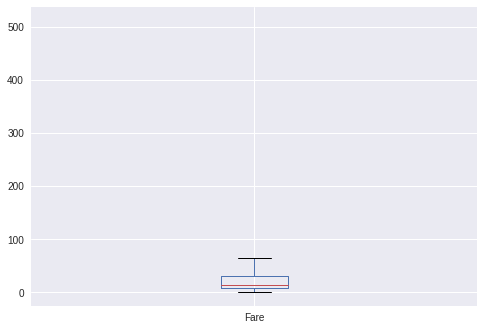

In [0]:
df.boxplot('Fare')

In [0]:
# bin Fare into five intervals with equal amount of people
df['Fare-bin'] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5]).astype(int)

### Cabin

In [0]:
# check if there is any NAN
df['Cabin'].isnull().sum(axis=0)

1014

In [0]:
df = df.drop(labels=['Cabin'], axis=1)

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,S,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,S,2


### Embarked

In [0]:
#df = df.drop(labels='Embarked', axis=1)
df['Embarked'].isna().value_counts()

False    1307
True        2
Name: Embarked, dtype: int64

In [0]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [0]:
df['Embarked'].fillna("S", inplace=True)

In [0]:
df['Embarked'].isna().value_counts()

False    1309
Name: Embarked, dtype: int64

In [0]:
df['Embarked'] = encode_label(df['Embarked'])

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,0,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,2,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,2,2


### Name

In [0]:
df['Title'] = df['Name'].map(lambda z: z.split(",")[1].split(".")[0])

In [0]:
df['Title'] = encode_label(df['Title'])

In [0]:
def get_titles(df):
    title_dictionary = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Dona": "Royalty",
        "Sir": "Royalty",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royalty",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royalty"
    }
    print(df['Name'])

    def process_name(x):
        # print(x)
        return x.split(',')[1].split('.')[0].strip()

    df['Title'] = df['Name'].map(process_name)
    df['Title'] = df.Title.map(title_dictionary)
    print(df['Name'][df['Title'].isna()])

    return df

In [0]:
df = get_titles(df)
df['Title'] = df['Title'].map({'Officer': 0, 'Royalty': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Mr': 5}).astype(int)

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [0]:
df.drop('Name', axis=1, inplace=True)

In [0]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title
0,1,0,3,0,22.0,1,0,3,7.2500,2,1,5
1,2,1,1,1,38.0,1,0,5,71.2833,0,5,2
2,3,1,3,1,26.0,0,0,6,7.9250,2,2,3
3,4,1,1,1,35.0,1,0,0,53.1000,2,5,2
4,5,0,3,0,35.0,0,0,2,8.0500,2,2,5


### PassengerId

In [0]:
df.drop('PassengerId',axis= 1, inplace=True)

In [0]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title
0,0,3,0,22.0,1,0,3,7.2500,2,1,5
1,1,1,1,38.0,1,0,5,71.2833,0,5,2
2,1,3,1,26.0,0,0,6,7.9250,2,2,3
3,1,1,1,35.0,1,0,0,53.1000,2,5,2
4,0,3,0,35.0,0,0,2,8.0500,2,2,5


### Age

In [0]:
df['Age'].isna().value_counts()

False    1046
True      263
Name: Age, dtype: int64

The change of Age as a function of Title, Fare-bin, or SibSp is quite significant, so I'll use them to guess the missing values. I use a random forest regressor to do this. 

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
# notice that instead of using Title, we should use its corresponding dummy variables 
df_sub = df[['Age','Title','Fare','SibSp']]

In [0]:
X_train  = df_sub.dropna().drop('Age', axis=1)
y_train  = df['Age'].dropna()

X_test = df_sub.loc[np.isnan(df.Age)].drop('Age', axis=1)

In [0]:
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test),1)

In [0]:
df.Age.loc[df.Age.isnull()] = y_pred
df.Age.isnull().sum(axis=0) # no more NAN now

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [0]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title
0,0,3,0,22.0,1,0,3,7.2500,2,1,5
1,1,1,1,38.0,1,0,5,71.2833,0,5,2
2,1,3,1,26.0,0,0,6,7.9250,2,2,3
3,1,1,1,35.0,1,0,0,53.1000,2,5,2
4,0,3,0,35.0,0,0,2,8.0500,2,2,5


In [0]:
df['Age-bin'] = df['Age']
df.loc[df['Age-bin'] <= 16, 'Age-bin'] = 0
df.loc[(df['Age-bin'] > 16) & (df['Age-bin'] <= 32), 'Age-bin'] = 1
df.loc[(df['Age-bin'] > 32), 'Age-bin'] = 2

In [0]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title,Age-bin
0,0,3,0,22.0,1,0,3,7.2500,2,1,5,1.0
1,1,1,1,38.0,1,0,5,71.2833,0,5,2,2.0
2,1,3,1,26.0,0,0,6,7.9250,2,2,3,1.0
3,1,1,1,35.0,1,0,0,53.1000,2,5,2,2.0
4,0,3,0,35.0,0,0,2,8.0500,2,2,5,2.0


### Family

In [0]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
df['SmallFamily'] = df['FamilySize'].map(lambda s: 1 if 2 <= s <= 3 else 0)
df['MediumFamily'] = df['FamilySize'].map(lambda s: 1 if s == 4 else 0)
df['LargeFamily'] = df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)


In [0]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title,Age-bin,FamilySize,Singleton,SmallFamily,MediumFamily,LargeFamily
0,0,3,0,22.0,1,0,3,7.2500,2,1,5,1.0,2,0,1,0,0
1,1,1,1,38.0,1,0,5,71.2833,0,5,2,2.0,2,0,1,0,0
2,1,3,1,26.0,0,0,6,7.9250,2,2,3,1.0,1,1,0,0,0
3,1,1,1,35.0,1,0,0,53.1000,2,5,2,2.0,2,0,1,0,0
4,0,3,0,35.0,0,0,2,8.0500,2,2,5,2.0,1,1,0,0,0


# First ML executions

In [0]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [0]:
df_basic = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]

In [0]:
df_basic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,3,7.2500,2
1,1,1,1,38.0,1,0,5,71.2833,0
2,1,3,1,26.0,0,0,6,7.9250,2
3,1,1,1,35.0,1,0,0,53.1000,2
4,0,3,0,35.0,0,0,2,8.0500,2


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
Survived        1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null int64
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Ticket          1309 non-null int8
Fare            1309 non-null float64
Embarked        1309 non-null int8
Fare-bin        1309 non-null int64
Title           1309 non-null int64
Age-bin         1309 non-null float64
FamilySize      1309 non-null int64
Singleton       1309 non-null int64
SmallFamily     1309 non-null int64
MediumFamily    1309 non-null int64
LargeFamily     1309 non-null int64
dtypes: float64(3), int64(12), int8(2)
memory usage: 156.0 KB


### Feature Selection

In [0]:
from sklearn.feature_selection import SelectFromModel

In [0]:
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

NameError: ignored

### Clasifiying

In [0]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [0]:
X = df_basic.drop('Survived', axis=1)
y = df_basic['Survived']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [0]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(1309, 7)

In [0]:
X_new

array([[ 3.    ,  0.    , 22.    , ...,  3.    ,  7.25  ,  2.    ],
       [ 1.    ,  1.    , 38.    , ...,  5.    , 71.2833,  0.    ],
       [ 3.    ,  1.    , 26.    , ...,  6.    ,  7.925 ,  2.    ],
       ...,
       [ 3.    ,  0.    , 38.5   , ...,  6.    ,  7.25  ,  2.    ],
       [ 3.    ,  0.    , 30.9   , ...,  2.    ,  8.05  ,  2.    ],
       [ 3.    ,  0.    ,  2.6   , ...,  1.    , 22.3583,  0.    ]])

In [0]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver='lbfgs')]

In [0]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_new, y)
clf.score(X_new, y)


0.974025974025974

In [0]:
scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    cv_results = cross_validate(clf, X_new, y_test, cv=5, return_train_score=True)
    scores.append(np.mean(cv_results['test_score']))

ValueError: ignored

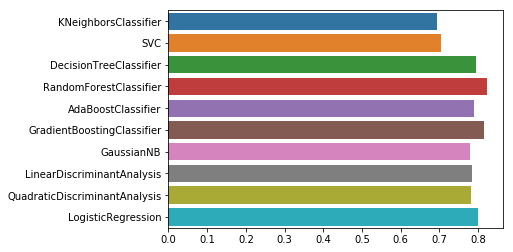

In [0]:
sns.barplot(y=[n.__class__.__name__  for n in classifiers], x=scores, orient='h')

# Neural networks

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import keras

Using TensorFlow backend.


In [0]:
import random
import sys
random_states = [random.randint(0, sys.maxsize) for i in range(5)]

In [0]:
random_states

[5278214375223005304,
 3496088612487283535,
 7767501554203803049,
 4532363307454014653,
 8065146060813784602]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [0]:


accuracies = []
losses = []
for i in range(0, 5):
    model = Sequential()
    model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


    # x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
    model.fit(X_train, y_train, epochs=400, batch_size=32, verbose=1)

    loss, acc = model.evaluate(X_test, y_test, batch_size=32)

    accuracies.append(acc)
    losses.append(loss)



Epoch 1/400
877/877 [==============================] - 0s 324us/step - loss: 5.7441 - acc: 0.6180
Epoch 2/400
877/877 [==============================] - 0s 33us/step - loss: 5.3654 - acc: 0.6180
Epoch 3/400
877/877 [==============================] - 0s 28us/step - loss: 4.6927 - acc: 0.6180
Epoch 4/400
877/877 [==============================] - 0s 32us/step - loss: 3.6636 - acc: 0.6203
Epoch 5/400
877/877 [==============================] - 0s 34us/step - loss: 2.5173 - acc: 0.5462
Epoch 6/400
877/877 [==============================] - 0s 29us/step - loss: 1.9982 - acc: 0.3820
Epoch 7/400
877/877 [==============================] - 0s 31us/step - loss: 1.6139 - acc: 0.4595
Epoch 8/400
877/877 [==============================] - 0s 37us/step - loss: 1.2617 - acc: 0.5633
Epoch 9/400
877/877 [==============================] - 0s 33us/step - loss: 0.9725 - acc: 0.6203
Epoch 10/400
877/877 [==============================] - 0s 32us/step - loss: 0.8054 - acc: 0.6784
Epoch 11/400
877/877 [======

877/877 [==============================] - 0s 28us/step - loss: 0.4676 - acc: 0.7799
Epoch 168/400
877/877 [==============================] - 0s 32us/step - loss: 0.4658 - acc: 0.7822
Epoch 169/400
877/877 [==============================] - 0s 32us/step - loss: 0.4624 - acc: 0.7879
Epoch 170/400
877/877 [==============================] - 0s 31us/step - loss: 0.4611 - acc: 0.7856
Epoch 171/400
877/877 [==============================] - 0s 28us/step - loss: 0.4609 - acc: 0.7902
Epoch 172/400
877/877 [==============================] - 0s 28us/step - loss: 0.4597 - acc: 0.7868
Epoch 173/400
877/877 [==============================] - 0s 33us/step - loss: 0.4622 - acc: 0.7856
Epoch 174/400
877/877 [==============================] - 0s 28us/step - loss: 0.4589 - acc: 0.7777
Epoch 175/400
877/877 [==============================] - 0s 29us/step - loss: 0.4598 - acc: 0.7799
Epoch 176/400
877/877 [==============================] - 0s 30us/step - loss: 0.4580 - acc: 0.7879
Epoch 177/400
877/877 [=

877/877 [==============================] - 0s 25us/step - loss: 0.4462 - acc: 0.8016
Epoch 332/400
877/877 [==============================] - 0s 26us/step - loss: 0.4458 - acc: 0.7959
Epoch 333/400
877/877 [==============================] - 0s 26us/step - loss: 0.4489 - acc: 0.7925
Epoch 334/400
877/877 [==============================] - 0s 26us/step - loss: 0.4454 - acc: 0.7982
Epoch 335/400
877/877 [==============================] - 0s 25us/step - loss: 0.4457 - acc: 0.7982
Epoch 336/400
877/877 [==============================] - 0s 25us/step - loss: 0.4480 - acc: 0.8016
Epoch 337/400
877/877 [==============================] - 0s 26us/step - loss: 0.4461 - acc: 0.7925
Epoch 338/400
877/877 [==============================] - 0s 26us/step - loss: 0.4522 - acc: 0.7913
Epoch 339/400
877/877 [==============================] - 0s 25us/step - loss: 0.4435 - acc: 0.7970
Epoch 340/400
877/877 [==============================] - 0s 26us/step - loss: 0.4476 - acc: 0.7993
Epoch 341/400
877/877 [=

877/877 [==============================] - 0s 26us/step - loss: 0.6148 - acc: 0.6853
Epoch 97/400
877/877 [==============================] - 0s 26us/step - loss: 0.6146 - acc: 0.6876
Epoch 98/400
877/877 [==============================] - 0s 26us/step - loss: 0.6140 - acc: 0.6876
Epoch 99/400
877/877 [==============================] - 0s 28us/step - loss: 0.6134 - acc: 0.6876
Epoch 100/400
877/877 [==============================] - 0s 26us/step - loss: 0.6128 - acc: 0.6887
Epoch 101/400
877/877 [==============================] - 0s 25us/step - loss: 0.6124 - acc: 0.6876
Epoch 102/400
877/877 [==============================] - 0s 25us/step - loss: 0.6118 - acc: 0.6876
Epoch 103/400
877/877 [==============================] - 0s 30us/step - loss: 0.6112 - acc: 0.6876
Epoch 104/400
877/877 [==============================] - 0s 28us/step - loss: 0.6106 - acc: 0.6887
Epoch 105/400
877/877 [==============================] - 0s 26us/step - loss: 0.6104 - acc: 0.6876
Epoch 106/400
877/877 [====

877/877 [==============================] - 0s 26us/step - loss: 0.4772 - acc: 0.7913
Epoch 261/400
877/877 [==============================] - 0s 27us/step - loss: 0.4773 - acc: 0.7891
Epoch 262/400
877/877 [==============================] - 0s 26us/step - loss: 0.4771 - acc: 0.7902
Epoch 263/400
877/877 [==============================] - 0s 28us/step - loss: 0.4769 - acc: 0.7925
Epoch 264/400
877/877 [==============================] - 0s 26us/step - loss: 0.4764 - acc: 0.7913
Epoch 265/400
877/877 [==============================] - 0s 27us/step - loss: 0.4769 - acc: 0.7891
Epoch 266/400
877/877 [==============================] - 0s 26us/step - loss: 0.4766 - acc: 0.7913
Epoch 267/400
877/877 [==============================] - 0s 27us/step - loss: 0.4774 - acc: 0.7902
Epoch 268/400
877/877 [==============================] - 0s 26us/step - loss: 0.4775 - acc: 0.7868
Epoch 269/400
877/877 [==============================] - 0s 25us/step - loss: 0.4759 - acc: 0.7913
Epoch 270/400
877/877 [=

877/877 [==============================] - 0s 26us/step - loss: 0.5981 - acc: 0.6705
Epoch 25/400
877/877 [==============================] - 0s 28us/step - loss: 0.5949 - acc: 0.6750
Epoch 26/400
877/877 [==============================] - 0s 26us/step - loss: 0.5890 - acc: 0.6842
Epoch 27/400
877/877 [==============================] - 0s 26us/step - loss: 0.5836 - acc: 0.6864
Epoch 28/400
877/877 [==============================] - 0s 27us/step - loss: 0.5832 - acc: 0.7047
Epoch 29/400
877/877 [==============================] - 0s 26us/step - loss: 0.5729 - acc: 0.6921
Epoch 30/400
877/877 [==============================] - 0s 27us/step - loss: 0.5676 - acc: 0.7058
Epoch 31/400
877/877 [==============================] - 0s 31us/step - loss: 0.5644 - acc: 0.7047
Epoch 32/400
877/877 [==============================] - 0s 28us/step - loss: 0.5643 - acc: 0.7206
Epoch 33/400
877/877 [==============================] - 0s 26us/step - loss: 0.5560 - acc: 0.7252
Epoch 34/400
877/877 [===========

877/877 [==============================] - 0s 26us/step - loss: 0.4620 - acc: 0.7936
Epoch 190/400
877/877 [==============================] - 0s 28us/step - loss: 0.4614 - acc: 0.7936
Epoch 191/400
877/877 [==============================] - 0s 25us/step - loss: 0.4606 - acc: 0.8005
Epoch 192/400
877/877 [==============================] - 0s 28us/step - loss: 0.4625 - acc: 0.8005
Epoch 193/400
877/877 [==============================] - 0s 26us/step - loss: 0.4622 - acc: 0.7868
Epoch 194/400
877/877 [==============================] - 0s 27us/step - loss: 0.4629 - acc: 0.7993
Epoch 195/400
877/877 [==============================] - 0s 27us/step - loss: 0.4616 - acc: 0.7993
Epoch 196/400
877/877 [==============================] - 0s 29us/step - loss: 0.4617 - acc: 0.7925
Epoch 197/400
877/877 [==============================] - 0s 25us/step - loss: 0.4595 - acc: 0.8016
Epoch 198/400
877/877 [==============================] - 0s 26us/step - loss: 0.4649 - acc: 0.7879
Epoch 199/400
877/877 [=

877/877 [==============================] - 0s 27us/step - loss: 0.4494 - acc: 0.8096
Epoch 354/400
877/877 [==============================] - 0s 28us/step - loss: 0.4516 - acc: 0.8096
Epoch 355/400
877/877 [==============================] - 0s 27us/step - loss: 0.4476 - acc: 0.8073
Epoch 356/400
877/877 [==============================] - 0s 29us/step - loss: 0.4492 - acc: 0.8073
Epoch 357/400
877/877 [==============================] - 0s 26us/step - loss: 0.4538 - acc: 0.8107
Epoch 358/400
877/877 [==============================] - 0s 30us/step - loss: 0.4553 - acc: 0.8141
Epoch 359/400
877/877 [==============================] - 0s 27us/step - loss: 0.4479 - acc: 0.8130
Epoch 360/400
877/877 [==============================] - 0s 26us/step - loss: 0.4523 - acc: 0.8005
Epoch 361/400
877/877 [==============================] - 0s 26us/step - loss: 0.4497 - acc: 0.8119
Epoch 362/400
877/877 [==============================] - 0s 27us/step - loss: 0.4501 - acc: 0.8096
Epoch 363/400
877/877 [=

877/877 [==============================] - 0s 29us/step - loss: 0.4710 - acc: 0.7845
Epoch 119/400
877/877 [==============================] - 0s 27us/step - loss: 0.4674 - acc: 0.7868
Epoch 120/400
877/877 [==============================] - 0s 26us/step - loss: 0.4676 - acc: 0.7834
Epoch 121/400
877/877 [==============================] - 0s 28us/step - loss: 0.4696 - acc: 0.7879
Epoch 122/400
877/877 [==============================] - 0s 27us/step - loss: 0.4658 - acc: 0.7948
Epoch 123/400
877/877 [==============================] - 0s 27us/step - loss: 0.4685 - acc: 0.7799
Epoch 124/400
877/877 [==============================] - 0s 28us/step - loss: 0.4657 - acc: 0.7902
Epoch 125/400
877/877 [==============================] - 0s 27us/step - loss: 0.4698 - acc: 0.7822
Epoch 126/400
877/877 [==============================] - 0s 29us/step - loss: 0.4671 - acc: 0.7834
Epoch 127/400
877/877 [==============================] - 0s 27us/step - loss: 0.4673 - acc: 0.7799
Epoch 128/400
877/877 [=

877/877 [==============================] - 0s 25us/step - loss: 0.4593 - acc: 0.7948
Epoch 283/400
877/877 [==============================] - 0s 28us/step - loss: 0.4593 - acc: 0.7970
Epoch 284/400
877/877 [==============================] - 0s 26us/step - loss: 0.4657 - acc: 0.7856
Epoch 285/400
877/877 [==============================] - 0s 27us/step - loss: 0.4595 - acc: 0.7879
Epoch 286/400
877/877 [==============================] - 0s 26us/step - loss: 0.4595 - acc: 0.7936
Epoch 287/400
877/877 [==============================] - 0s 27us/step - loss: 0.4592 - acc: 0.7879
Epoch 288/400
877/877 [==============================] - 0s 28us/step - loss: 0.4611 - acc: 0.7822
Epoch 289/400
877/877 [==============================] - 0s 30us/step - loss: 0.4590 - acc: 0.7902
Epoch 290/400
877/877 [==============================] - 0s 25us/step - loss: 0.4580 - acc: 0.7913
Epoch 291/400
877/877 [==============================] - 0s 25us/step - loss: 0.4608 - acc: 0.7902
Epoch 292/400
877/877 [=

877/877 [==============================] - 0s 29us/step - loss: 0.5812 - acc: 0.7298
Epoch 47/400
877/877 [==============================] - 0s 26us/step - loss: 0.5783 - acc: 0.7263
Epoch 48/400
877/877 [==============================] - 0s 29us/step - loss: 0.5767 - acc: 0.7343
Epoch 49/400
877/877 [==============================] - 0s 26us/step - loss: 0.5777 - acc: 0.7263
Epoch 50/400
877/877 [==============================] - 0s 28us/step - loss: 0.5762 - acc: 0.7309
Epoch 51/400
877/877 [==============================] - 0s 27us/step - loss: 0.5779 - acc: 0.7241
Epoch 52/400
877/877 [==============================] - 0s 30us/step - loss: 0.5772 - acc: 0.7275
Epoch 53/400
877/877 [==============================] - 0s 27us/step - loss: 0.5700 - acc: 0.7320
Epoch 54/400
877/877 [==============================] - 0s 28us/step - loss: 0.5686 - acc: 0.7275
Epoch 55/400
877/877 [==============================] - 0s 28us/step - loss: 0.5662 - acc: 0.7332
Epoch 56/400
877/877 [===========

877/877 [==============================] - 0s 28us/step - loss: 0.4424 - acc: 0.7936
Epoch 212/400
877/877 [==============================] - 0s 31us/step - loss: 0.4403 - acc: 0.8005
Epoch 213/400
877/877 [==============================] - 0s 33us/step - loss: 0.4413 - acc: 0.8005
Epoch 214/400
877/877 [==============================] - 0s 28us/step - loss: 0.4396 - acc: 0.7959
Epoch 215/400
877/877 [==============================] - 0s 28us/step - loss: 0.4415 - acc: 0.7993
Epoch 216/400
877/877 [==============================] - 0s 26us/step - loss: 0.4450 - acc: 0.8027
Epoch 217/400
877/877 [==============================] - 0s 27us/step - loss: 0.4426 - acc: 0.7948
Epoch 218/400
877/877 [==============================] - 0s 28us/step - loss: 0.4422 - acc: 0.8005
Epoch 219/400
877/877 [==============================] - 0s 28us/step - loss: 0.4405 - acc: 0.8027
Epoch 220/400
877/877 [==============================] - 0s 26us/step - loss: 0.4407 - acc: 0.7970
Epoch 221/400
877/877 [=

877/877 [==============================] - 0s 28us/step - loss: 0.4407 - acc: 0.8016
Epoch 376/400
877/877 [==============================] - 0s 29us/step - loss: 0.4310 - acc: 0.8073
Epoch 377/400
877/877 [==============================] - 0s 27us/step - loss: 0.4345 - acc: 0.7993
Epoch 378/400
877/877 [==============================] - 0s 27us/step - loss: 0.4308 - acc: 0.8062
Epoch 379/400
877/877 [==============================] - 0s 27us/step - loss: 0.4336 - acc: 0.8096
Epoch 380/400
877/877 [==============================] - 0s 27us/step - loss: 0.4341 - acc: 0.8164
Epoch 381/400
877/877 [==============================] - 0s 28us/step - loss: 0.4341 - acc: 0.8050
Epoch 382/400
877/877 [==============================] - 0s 28us/step - loss: 0.4322 - acc: 0.8096
Epoch 383/400
877/877 [==============================] - 0s 33us/step - loss: 0.4354 - acc: 0.8073
Epoch 384/400
877/877 [==============================] - 0s 31us/step - loss: 0.4322 - acc: 0.8062
Epoch 385/400
877/877 [=

In [0]:
print("Accuracy: " + str(np.mean(accuracies)))
print("Loss: " + str(np.mean(losses)))

Accuracy: 0.7986111111111112
Loss: 0.470904086916535


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


# Following with the feature extraction

### Dummy extraction

In [0]:
df = pd.get_dummies(df, columns=['Embarked', 'Pclass', 'Age-bin','Fare-bin', 'Title', 'Ticket'])

In [0]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,Singleton,SmallFamily,MediumFamily,...,Title_3,Title_4,Title_5,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6
0,0,0,22.0,1,0,7.2500,2,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,26.0,0,0,7.9250,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 38 columns):
Survived        1309 non-null int64
Sex             1309 non-null int64
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Fare            1309 non-null float64
FamilySize      1309 non-null int64
Singleton       1309 non-null int64
SmallFamily     1309 non-null int64
MediumFamily    1309 non-null int64
LargeFamily     1309 non-null int64
Embarked_0      1309 non-null uint8
Embarked_1      1309 non-null uint8
Embarked_2      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Age-bin_0.0     1309 non-null uint8
Age-bin_1.0     1309 non-null uint8
Age-bin_2.0     1309 non-null uint8
Fare-bin_1      1309 non-null uint8
Fare-bin_2      1309 non-null uint8
Fare-bin_3      1309 non-null uint8
Fare-bin_4      1309 non-null uint8
Fare-bin_5      1309 non-

## PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = df.drop(['Survived', 'Age', 'Fare'], axis=1,)
pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_
df_pca.head()

,Sex,SibSp,Parch,FamilySize,Singleton,SmallFamily,MediumFamily,LargeFamily,Embarked_0,Embarked_1,...,Title_3,Title_4,Title_5,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6
0,0,1,0,2,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,0,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,2,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [0]:
print(y_variance)

[4.56712350e-01 9.42653959e-02 6.38373298e-02 5.97403290e-02
 5.19822756e-02 3.89937714e-02 3.70064109e-02 3.29320668e-02
 2.16444504e-02 2.11593137e-02 1.91471096e-02 1.65919188e-02
 1.36560428e-02 1.16712913e-02 1.09820801e-02 1.05804404e-02
 9.19807882e-03 6.32569645e-03 5.65502647e-03 4.71911997e-03
 3.85767703e-03 3.27894057e-03 2.12075591e-03 2.03553136e-03
 1.22336928e-03 5.88321848e-04 9.49062099e-05 7.00729778e-31
 2.91601537e-31 8.53962498e-32 7.10071841e-32 2.63475187e-32
 2.21804325e-32 1.11393224e-32 5.87176990e-33]


In [0]:
print(pd.DataFrame(pca.components_, columns=df_pca.columns))

             Sex     SibSp     Parch  FamilySize  Singleton  SmallFamily  \
0   5.470397e-02  0.449297  0.331096    0.780393  -0.176206     0.060761   
1  -1.775109e-01  0.195684 -0.122234    0.073450   0.158384    -0.199433   
2   2.841588e-01 -0.558294  0.585893    0.027599  -0.002888    -0.032841   
3  -4.438825e-01 -0.261228  0.369099    0.107871   0.118799    -0.175484   
4  -4.405156e-02  0.066800 -0.094595   -0.027795  -0.082878     0.104421   
5  -2.397884e-01 -0.053744  0.087375    0.033631  -0.113196     0.148777   
6  -6.950040e-02 -0.124243  0.181511    0.057268   0.004319    -0.015854   
7   7.493391e-02  0.070631  0.001682    0.072314   0.444745    -0.606398   
8  -1.180543e-01 -0.063986  0.002696   -0.061290  -0.165516     0.180079   
9  -3.319145e-02  0.003384 -0.013416   -0.010032   0.064352    -0.080182   
10 -1.831374e-01 -0.088625  0.058711   -0.029914  -0.070107     0.088411   
11  3.688833e-02 -0.002729 -0.032375   -0.035104  -0.060072     0.084281   
12 -1.454020

Text(0.5,1,'PCA')

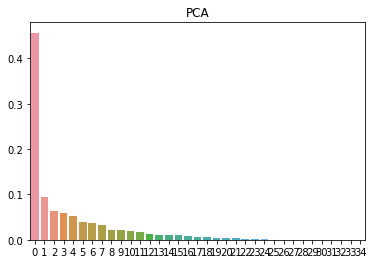

In [0]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")

### Feature Selection

In [0]:
pca = PCA()
df_pca = df.drop(['Survived', 'Fare', 'FamilySize', 'Age', 'LargeFamily', 'SibSp', 'Parch', 'Ticket_6', 'Age-bin_2.0', 'Title_5', 'Pclass_3', 'Fare-bin_5', 'Embarked_2'], axis=1,)
df_transformed = pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_
df_pca.head()

,Sex,Singleton,SmallFamily,MediumFamily,Embarked_0,Embarked_1,Pclass_1,Pclass_2,Age-bin_0.0,Age-bin_1.0,...,Title_1,Title_2,Title_3,Title_4,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [0]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
Sex             1309 non-null int64
Singleton       1309 non-null int64
SmallFamily     1309 non-null int64
MediumFamily    1309 non-null int64
Embarked_0      1309 non-null uint8
Embarked_1      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Age-bin_0.0     1309 non-null uint8
Age-bin_1.0     1309 non-null uint8
Fare-bin_1      1309 non-null uint8
Fare-bin_2      1309 non-null uint8
Fare-bin_3      1309 non-null uint8
Fare-bin_4      1309 non-null uint8
Title_0         1309 non-null uint8
Title_1         1309 non-null uint8
Title_2         1309 non-null uint8
Title_3         1309 non-null uint8
Title_4         1309 non-null uint8
Ticket_0        1309 non-null uint8
Ticket_1        1309 non-null uint8
Ticket_2        1309 non-null uint8
Ticket_3        1309 non-null uint8
Ticket_4        1309 non-null uint8
Ticket_5        1309 non-null

Text(0.5,1,'PCA')

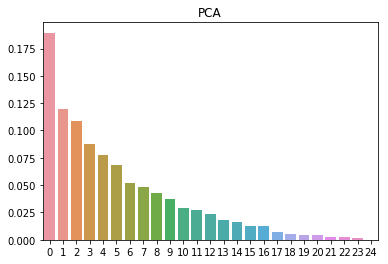

In [0]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")

In [0]:
df_transformed

array([[-3.44025421e-03,  1.19944718e-01,  1.15683574e-01, ...,
        -5.49259250e-02, -5.35664476e-03,  5.43263589e-03],
       [ 1.53989291e+00, -6.61576475e-01,  3.43636853e-01, ...,
         3.39224862e-02, -3.17521437e-02,  3.55411568e-03],
       [-5.58502778e-01,  9.20103134e-02,  6.05780299e-01, ...,
        -9.35030203e-02,  5.58262812e-03, -4.12299388e-03],
       ...,
       [-5.84995728e-01, -3.04083527e-01, -3.67119420e-01, ...,
        -7.77737985e-02, -1.89035356e-03,  6.84661609e-04],
       [-1.14249371e+00, -5.65198472e-02,  1.79703391e-01, ...,
         1.88564324e-02,  2.26477123e-03,  9.98064186e-05],
       [ 1.15147894e+00,  3.17958648e-01, -5.90899375e-01, ...,
         1.81682207e-01,  7.67927516e-03, -3.13714120e-03]])

## Classification

In [0]:
y_train = df[0:891]['Survived']
X_train = df_pca[0:891]
y_test = df[891:]['Survived']
X_test = df_pca[891:]

In [0]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33)

### Traditional methods

In [0]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
X_train

array([[ 0.85345916, -0.77106774,  0.13554158, ..., -0.10827513,
        -0.50666136, -0.57547083],
       [-0.3252553 ,  1.29690292, -0.15145397, ..., -0.68377385,
        -0.40941737,  0.63481195],
       [-0.3252553 , -0.77106774, -0.43844952, ...,  2.19371974,
         0.7283682 ,  0.63481195],
       ...,
       [-0.3252553 , -0.77106774,  0.35078825, ..., -0.68377385,
        -0.4564333 ,  0.63481195],
       [ 0.85345916, -0.77106774, -1.6581806 , ..., -0.10827513,
         0.09247771,  0.63481195],
       [ 0.85345916, -0.77106774, -1.15593839, ...,  0.46722359,
        -0.48041143,  0.63481195]])

In [0]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver='lbfgs')]

In [0]:
scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    cv_results = cross_validate(clf, X_test, y_test, cv=5, return_train_score=True)
    scores.append(np.mean(cv_results['test_score']))

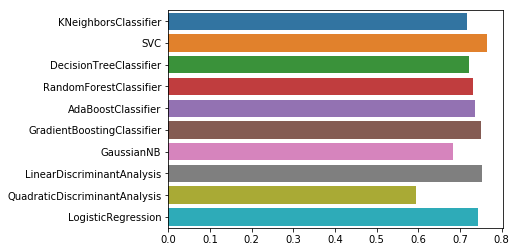

In [0]:
sns.barplot(y=[n.__class__.__name__  for n in classifiers], x=scores, orient='h')

## Saving the dataframes to further work

In [0]:
df_pca['Survived'] = df['Survived']
df_pca.to_csv('kernel.csv')

PermissionError: [Errno 13] Permission denied: 'kernel.csv'

### Neural Networks

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import keras

Using TensorFlow backend.


In [0]:
import random
import sys
random_states = [random.randint(0, sys.maxsize) for i in range(5)]

In [0]:
random_states

[2325906488501099946,
 9097134840918768130,
 8864386880132623872,
 7412006767748844131,
 257542149573159128]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33)

In [0]:


accuracies = []
losses = []
for i in range(0, 5):
    model = Sequential()
    model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


    # x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
    model.fit(X_train, y_train, epochs=400, batch_size=32, verbose=1, validation_data=(X_test, y_test))

    loss, acc = model.evaluate(X_test, y_test, batch_size=32)

    accuracies.append(acc)
    losses.append(loss)



Epoch 1/400
596/596 [==============================] - 1s 1ms/step - loss: 1.0867 - acc: 0.4379
Epoch 2/400
596/596 [==============================] - 0s 40us/step - loss: 0.9771 - acc: 0.4497
Epoch 3/400
596/596 [==============================] - 0s 34us/step - loss: 0.8885 - acc: 0.4648
Epoch 4/400
596/596 [==============================] - 0s 32us/step - loss: 0.8197 - acc: 0.4815
Epoch 5/400
596/596 [==============================] - 0s 29us/step - loss: 0.7647 - acc: 0.5151
Epoch 6/400
596/596 [==============================] - 0s 32us/step - loss: 0.7229 - acc: 0.5470
Epoch 7/400
596/596 [==============================] - 0s 34us/step - loss: 0.6878 - acc: 0.5755
Epoch 8/400
596/596 [==============================] - 0s 30us/step - loss: 0.6587 - acc: 0.6057
Epoch 9/400
596/596 [==============================] - 0s 37us/step - loss: 0.6305 - acc: 0.6644
Epoch 10/400
596/596 [==============================] - 0s 39us/step - loss: 0.6060 - acc: 0.6963
Epoch 11/400
596/596 [========

596/596 [==============================] - 0s 40us/step - loss: 0.3415 - acc: 0.8775
Epoch 168/400
596/596 [==============================] - 0s 29us/step - loss: 0.3413 - acc: 0.8775
Epoch 169/400
596/596 [==============================] - 0s 27us/step - loss: 0.3409 - acc: 0.8758
Epoch 170/400
596/596 [==============================] - 0s 30us/step - loss: 0.3409 - acc: 0.8775
Epoch 171/400
596/596 [==============================] - 0s 29us/step - loss: 0.3408 - acc: 0.8809
Epoch 172/400
596/596 [==============================] - 0s 32us/step - loss: 0.3405 - acc: 0.8809
Epoch 173/400
596/596 [==============================] - 0s 34us/step - loss: 0.3402 - acc: 0.8792
Epoch 174/400
596/596 [==============================] - 0s 35us/step - loss: 0.3401 - acc: 0.8792
Epoch 175/400
596/596 [==============================] - 0s 30us/step - loss: 0.3399 - acc: 0.8775
Epoch 176/400
596/596 [==============================] - 0s 30us/step - loss: 0.3394 - acc: 0.8758
Epoch 177/400
596/596 [=

596/596 [==============================] - 0s 32us/step - loss: 0.3127 - acc: 0.8792
Epoch 332/400
596/596 [==============================] - 0s 29us/step - loss: 0.3119 - acc: 0.8792
Epoch 333/400
596/596 [==============================] - 0s 29us/step - loss: 0.3125 - acc: 0.8809
Epoch 334/400
596/596 [==============================] - 0s 27us/step - loss: 0.3119 - acc: 0.8809
Epoch 335/400
596/596 [==============================] - 0s 27us/step - loss: 0.3120 - acc: 0.8792
Epoch 336/400
596/596 [==============================] - 0s 25us/step - loss: 0.3120 - acc: 0.8758
Epoch 337/400
596/596 [==============================] - 0s 30us/step - loss: 0.3117 - acc: 0.8792
Epoch 338/400
596/596 [==============================] - 0s 29us/step - loss: 0.3118 - acc: 0.8809
Epoch 339/400
596/596 [==============================] - 0s 27us/step - loss: 0.3116 - acc: 0.8809
Epoch 340/400
596/596 [==============================] - 0s 34us/step - loss: 0.3122 - acc: 0.8792
Epoch 341/400
596/596 [=

596/596 [==============================] - 0s 27us/step - loss: 0.3576 - acc: 0.8591
Epoch 97/400
596/596 [==============================] - 0s 32us/step - loss: 0.3569 - acc: 0.8591
Epoch 98/400
596/596 [==============================] - 0s 29us/step - loss: 0.3565 - acc: 0.8591
Epoch 99/400
596/596 [==============================] - 0s 29us/step - loss: 0.3563 - acc: 0.8574
Epoch 100/400
596/596 [==============================] - 0s 30us/step - loss: 0.3558 - acc: 0.8591
Epoch 101/400
596/596 [==============================] - 0s 35us/step - loss: 0.3551 - acc: 0.8591
Epoch 102/400
596/596 [==============================] - 0s 37us/step - loss: 0.3544 - acc: 0.8591
Epoch 103/400
596/596 [==============================] - 0s 30us/step - loss: 0.3542 - acc: 0.8591
Epoch 104/400
596/596 [==============================] - 0s 32us/step - loss: 0.3537 - acc: 0.8591
Epoch 105/400
596/596 [==============================] - 0s 37us/step - loss: 0.3534 - acc: 0.8591
Epoch 106/400
596/596 [====

596/596 [==============================] - 0s 30us/step - loss: 0.3232 - acc: 0.8691
Epoch 261/400
596/596 [==============================] - 0s 29us/step - loss: 0.3227 - acc: 0.8725
Epoch 262/400
596/596 [==============================] - 0s 34us/step - loss: 0.3231 - acc: 0.8708
Epoch 263/400
596/596 [==============================] - 0s 29us/step - loss: 0.3224 - acc: 0.8775
Epoch 264/400
596/596 [==============================] - 0s 35us/step - loss: 0.3226 - acc: 0.8708
Epoch 265/400
596/596 [==============================] - 0s 45us/step - loss: 0.3225 - acc: 0.8758
Epoch 266/400
596/596 [==============================] - 0s 29us/step - loss: 0.3221 - acc: 0.8758
Epoch 267/400
596/596 [==============================] - 0s 30us/step - loss: 0.3222 - acc: 0.8742
Epoch 268/400
596/596 [==============================] - 0s 39us/step - loss: 0.3221 - acc: 0.8758
Epoch 269/400
596/596 [==============================] - 0s 34us/step - loss: 0.3219 - acc: 0.8758
Epoch 270/400
596/596 [=

596/596 [==============================] - 0s 34us/step - loss: 0.4316 - acc: 0.8205
Epoch 25/400
596/596 [==============================] - 0s 32us/step - loss: 0.4277 - acc: 0.8221
Epoch 26/400
596/596 [==============================] - 0s 34us/step - loss: 0.4242 - acc: 0.8255
Epoch 27/400
596/596 [==============================] - 0s 39us/step - loss: 0.4209 - acc: 0.8289
Epoch 28/400
596/596 [==============================] - 0s 29us/step - loss: 0.4179 - acc: 0.8305
Epoch 29/400
596/596 [==============================] - 0s 32us/step - loss: 0.4149 - acc: 0.8322
Epoch 30/400
596/596 [==============================] - 0s 30us/step - loss: 0.4120 - acc: 0.8305
Epoch 31/400
596/596 [==============================] - 0s 32us/step - loss: 0.4096 - acc: 0.8289
Epoch 32/400
596/596 [==============================] - 0s 32us/step - loss: 0.4075 - acc: 0.8305
Epoch 33/400
596/596 [==============================] - 0s 42us/step - loss: 0.4053 - acc: 0.8305
Epoch 34/400
596/596 [===========

596/596 [==============================] - 0s 32us/step - loss: 0.3192 - acc: 0.8691
Epoch 190/400
596/596 [==============================] - 0s 32us/step - loss: 0.3194 - acc: 0.8691
Epoch 191/400
596/596 [==============================] - 0s 35us/step - loss: 0.3187 - acc: 0.8674
Epoch 192/400
596/596 [==============================] - 0s 34us/step - loss: 0.3189 - acc: 0.8674
Epoch 193/400
596/596 [==============================] - 0s 34us/step - loss: 0.3183 - acc: 0.8691
Epoch 194/400
596/596 [==============================] - 0s 37us/step - loss: 0.3180 - acc: 0.8691
Epoch 195/400
596/596 [==============================] - 0s 34us/step - loss: 0.3182 - acc: 0.8691
Epoch 196/400
596/596 [==============================] - 0s 32us/step - loss: 0.3177 - acc: 0.8691
Epoch 197/400
596/596 [==============================] - 0s 35us/step - loss: 0.3180 - acc: 0.8691
Epoch 198/400
596/596 [==============================] - 0s 30us/step - loss: 0.3176 - acc: 0.8691
Epoch 199/400
596/596 [=

596/596 [==============================] - ETA: 0s - loss: 0.3070 - acc: 0.906 - 0s 32us/step - loss: 0.3026 - acc: 0.8775
Epoch 354/400
596/596 [==============================] - 0s 30us/step - loss: 0.3025 - acc: 0.8758
Epoch 355/400
596/596 [==============================] - 0s 32us/step - loss: 0.3023 - acc: 0.8758
Epoch 356/400
596/596 [==============================] - 0s 32us/step - loss: 0.3026 - acc: 0.8775
Epoch 357/400
596/596 [==============================] - 0s 32us/step - loss: 0.3023 - acc: 0.8775
Epoch 358/400
596/596 [==============================] - 0s 34us/step - loss: 0.3017 - acc: 0.8775
Epoch 359/400
596/596 [==============================] - 0s 42us/step - loss: 0.3020 - acc: 0.8775
Epoch 360/400
596/596 [==============================] - 0s 30us/step - loss: 0.3018 - acc: 0.8775
Epoch 361/400
596/596 [==============================] - 0s 30us/step - loss: 0.3019 - acc: 0.8775
Epoch 362/400
596/596 [==============================] - 0s 34us/step - loss: 0.3015 

Epoch 35/400
596/596 [==============================] - 0s 35us/step - loss: 0.4163 - acc: 0.8289
Epoch 36/400
596/596 [==============================] - 0s 32us/step - loss: 0.4138 - acc: 0.8272
Epoch 37/400
596/596 [==============================] - 0s 32us/step - loss: 0.4116 - acc: 0.8289
Epoch 38/400
596/596 [==============================] - 0s 32us/step - loss: 0.4096 - acc: 0.8289
Epoch 39/400
596/596 [==============================] - 0s 34us/step - loss: 0.4079 - acc: 0.8289
Epoch 40/400
596/596 [==============================] - 0s 29us/step - loss: 0.4065 - acc: 0.8289
Epoch 41/400
596/596 [==============================] - 0s 32us/step - loss: 0.4050 - acc: 0.8289
Epoch 42/400
596/596 [==============================] - 0s 30us/step - loss: 0.4034 - acc: 0.8305
Epoch 43/400
596/596 [==============================] - 0s 29us/step - loss: 0.4024 - acc: 0.8305
Epoch 44/400
596/596 [==============================] - 0s 35us/step - loss: 0.4010 - acc: 0.8305
Epoch 45/400
596/596

596/596 [==============================] - 0s 42us/step - loss: 0.3407 - acc: 0.8725
Epoch 201/400
596/596 [==============================] - 0s 34us/step - loss: 0.3401 - acc: 0.8725
Epoch 202/400
596/596 [==============================] - 0s 30us/step - loss: 0.3401 - acc: 0.8758
Epoch 203/400
596/596 [==============================] - 0s 34us/step - loss: 0.3403 - acc: 0.8758
Epoch 204/400
596/596 [==============================] - 0s 32us/step - loss: 0.3400 - acc: 0.8725
Epoch 205/400
596/596 [==============================] - 0s 35us/step - loss: 0.3396 - acc: 0.8742
Epoch 206/400
596/596 [==============================] - 0s 39us/step - loss: 0.3398 - acc: 0.8725
Epoch 207/400
596/596 [==============================] - 0s 29us/step - loss: 0.3392 - acc: 0.8708
Epoch 208/400
596/596 [==============================] - 0s 32us/step - loss: 0.3391 - acc: 0.8674
Epoch 209/400
596/596 [==============================] - 0s 37us/step - loss: 0.3388 - acc: 0.8758
Epoch 210/400
596/596 [=

596/596 [==============================] - 0s 29us/step - loss: 0.3204 - acc: 0.8708
Epoch 364/400
596/596 [==============================] - 0s 30us/step - loss: 0.3203 - acc: 0.8691
Epoch 365/400
596/596 [==============================] - 0s 30us/step - loss: 0.3201 - acc: 0.8674
Epoch 366/400
596/596 [==============================] - 0s 30us/step - loss: 0.3199 - acc: 0.8742
Epoch 367/400
596/596 [==============================] - 0s 35us/step - loss: 0.3199 - acc: 0.8708
Epoch 368/400
596/596 [==============================] - 0s 35us/step - loss: 0.3198 - acc: 0.8725
Epoch 369/400
596/596 [==============================] - 0s 30us/step - loss: 0.3201 - acc: 0.8725
Epoch 370/400
596/596 [==============================] - 0s 39us/step - loss: 0.3200 - acc: 0.8742
Epoch 371/400
596/596 [==============================] - 0s 29us/step - loss: 0.3195 - acc: 0.8742
Epoch 372/400
596/596 [==============================] - 0s 39us/step - loss: 0.3196 - acc: 0.8742
Epoch 373/400
596/596 [=

596/596 [==============================] - 0s 37us/step - loss: 0.3922 - acc: 0.8473
Epoch 129/400
596/596 [==============================] - 0s 37us/step - loss: 0.3911 - acc: 0.8473
Epoch 130/400
596/596 [==============================] - 0s 30us/step - loss: 0.3905 - acc: 0.8507
Epoch 131/400
596/596 [==============================] - 0s 30us/step - loss: 0.3898 - acc: 0.8540
Epoch 132/400
596/596 [==============================] - 0s 37us/step - loss: 0.3895 - acc: 0.8540
Epoch 133/400
596/596 [==============================] - 0s 32us/step - loss: 0.3887 - acc: 0.8540
Epoch 134/400
596/596 [==============================] - 0s 29us/step - loss: 0.3879 - acc: 0.8540
Epoch 135/400
596/596 [==============================] - 0s 30us/step - loss: 0.3871 - acc: 0.8540
Epoch 136/400
596/596 [==============================] - 0s 30us/step - loss: 0.3868 - acc: 0.8540
Epoch 137/400
596/596 [==============================] - 0s 30us/step - loss: 0.3861 - acc: 0.8540
Epoch 138/400
596/596 [=

596/596 [==============================] - 0s 32us/step - loss: 0.3432 - acc: 0.8607
Epoch 293/400
596/596 [==============================] - 0s 34us/step - loss: 0.3433 - acc: 0.8607
Epoch 294/400
596/596 [==============================] - 0s 29us/step - loss: 0.3431 - acc: 0.8607
Epoch 295/400
596/596 [==============================] - 0s 35us/step - loss: 0.3430 - acc: 0.8607
Epoch 296/400
596/596 [==============================] - 0s 30us/step - loss: 0.3433 - acc: 0.8607
Epoch 297/400
596/596 [==============================] - 0s 32us/step - loss: 0.3430 - acc: 0.8607
Epoch 298/400
596/596 [==============================] - 0s 35us/step - loss: 0.3424 - acc: 0.8607
Epoch 299/400
596/596 [==============================] - 0s 29us/step - loss: 0.3424 - acc: 0.8607
Epoch 300/400
596/596 [==============================] - 0s 34us/step - loss: 0.3422 - acc: 0.8607
Epoch 301/400
596/596 [==============================] - 0s 35us/step - loss: 0.3421 - acc: 0.8607
Epoch 302/400
596/596 [=

In [0]:
print("Accuracy: " + str(np.mean(accuracies)))
print("Loss: " + str(np.mean(losses)))

Accuracy: 0.8081355937860779
Loss: 0.4824025662874772
